In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re

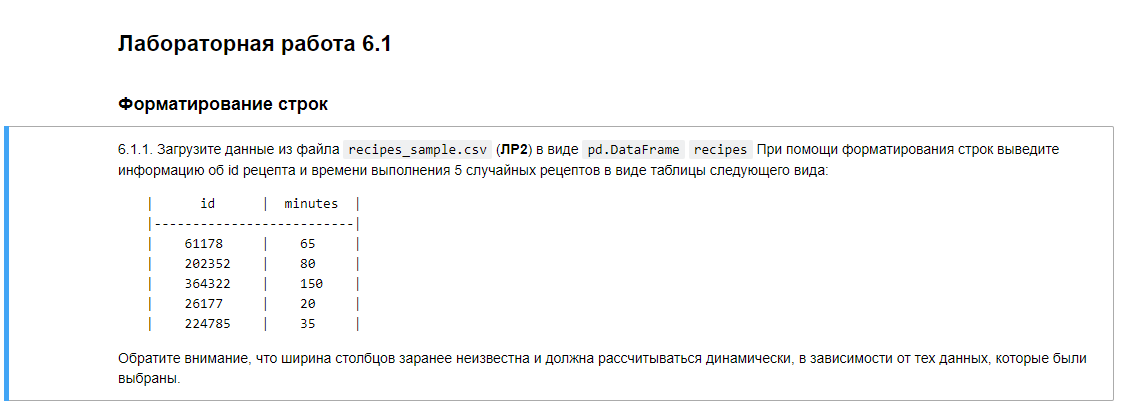

In [4]:
recipes = pd.read_csv('recipes_sample.csv')
sample = recipes.sample(5)
sample = sample.loc[:, sample.columns.isin(['id', 'minutes'])]
vals = sample.values
cols = sample.columns.values

In [5]:
max_len1 = len(str(max(vals[:, 0]))) + 8
max_len2 = len(str(max(vals[:, 1]))) + 8

In [6]:
qwe = '-' * (max_len1 + max_len2 + 1)
print(f'|{cols[0]: ^{max_len1}}|{cols[1]: ^{max_len2}}|')
print(f'|{qwe}|')
for i in range(5):
    print(f'|{vals[i][0]: ^{max_len1}}|{vals[i][1]: ^{max_len2}}|')

|      id      | minutes  |
|-------------------------|
|    383792    |    30    |
|    213346    |    25    |
|    62132     |    50    |
|    33923     |    30    |
|    121665    |    50    |


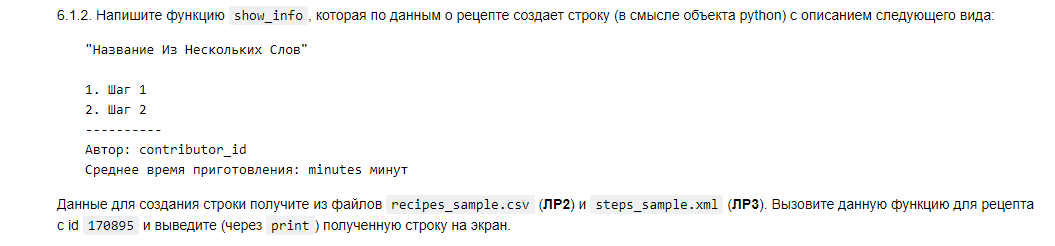

In [7]:
import requests
from bs4 import BeautifulSoup
counter = 0
with open('steps_sample.xml') as f:
    ab = BeautifulSoup(f, 'xml')
    idss = list()
    stepss = list()
    for recipe in ab.recipes.find_all("recipe"):
        for ids in recipe.find_all('id'):
            idss.append(str(ids)[4:-5])
        for steps in recipe.find_all('steps'):
            stepss.append(steps.text)
data = pd.DataFrame(data = [idss, stepss]).T

In [8]:
data = data.rename(columns = {0:"id", 1:"steps"})

In [9]:
recipes.id = recipes["id"].apply(lambda x: str(x))

In [10]:
all_data = recipes.merge(data)

In [11]:
def show_info(ids):
    step = all_data[all_data.id == str(ids)].steps.values[0]
    name = all_data[all_data.id == str(ids)].name.values[0]
    author = all_data[all_data.id == str(ids)].contributor_id.values[0]
    time = all_data[all_data.id == str(ids)].minutes.values[0]
    counter = -2
    for i in step:
        if i == "\n":
            counter += 1
    counter
    lst = step.split('\n')[1:-1]
    qwe = '-' * 10
    print(f'"{name}"')
    for i in range(1, counter + 1):
        print(f'{i}. {lst[i-1]}')
    print(f'{qwe}')
    print(f'Автор: {author}')
    print(f'Среднее время приготовления: {time} минут')
show_info(170895)

"leeks and parsnips  sauteed or creamed"
1. clean the leeks and discard the dark green portions
2. cut the leeks lengthwise then into one-inch pieces
3. melt the butter in a medium skillet , med
4. heat
5. add the garlic and fry 'til fragrant
6. add leeks and fry until the leeks are tender , about 6-minutes
7. meanwhile , peel and chunk the parsnips into one-inch pieces
8. place in a steaming basket and steam 'til they are as tender as you prefer
9. i like them fork-tender
10. drain parsnips and add to the skillet with the leeks
11. add salt and pepper
12. gently sautee together for 5-minutes
13. at this point you can serve it , or continue on and cream it:
14. in a jar with a screw top , add the half-n-half and arrowroot
15. shake 'til blended
16. turn heat to low under the leeks and parsnips
17. pour in the arrowroot mixture , stirring gently as you pour
18. if too thick , gradually add the water
19. let simmer for a couple of minutes
20. taste to adjust seasoning , probably an addit

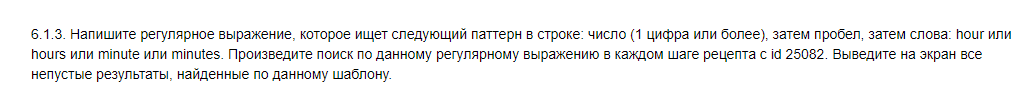

In [12]:
string = data[data.id == '25082'].steps.values[0]
lst = string.split('\n')[1:-1]

In [13]:
p = re.compile(r'[0-9]{1,}[\s](([h][o][u][r][s])|([h][o][u][r])|([m][i][n][u][t][e][s])|([m][i][n][u][t][e]))')

In [14]:
for i in lst:
    if p.search(i):
        print(i)

turn out onto a lightly floured board and knead for about 20 minutes , adding flour as nescessary to keep the dough from sticking to the board
when it has been sufficiently kneaded , cover it with a damp cloth for about 10 minutes and wash and grease the bowl lightly
let the dough rise until it springs back when you stick your finger in it , and it is about twice the size as it was before (this takes about 2 hours
when the dough has risen twice , deflate it again and cover it with the damp cloth again for about 10 minutes , then divide it into and shape it into loaves , buns , etc
bake at 400 for 20 minutes , and then turn the oven down to 350 and bake for 20-30 minutes longer , until the loaf is a lovely brown and sounds hollow when you thump it on the bottom


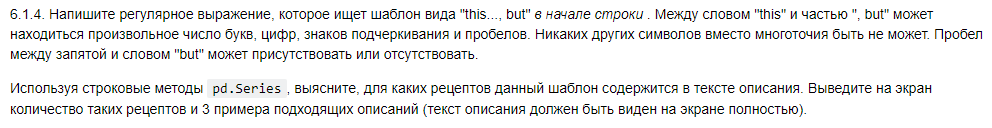

In [15]:
p = re.compile(r'^this[\s]{1}([\w]|[\s]){1,}[,][\s]{0,1}but[\s]{1}')
s = 'this q we r_,but '
bool(p.search(s))

True

In [16]:
counter = 0
a = np.array([])
for i in recipes.description.values:
    if bool(p.search(str(i))):
        a = np.append(a, i)
        counter += 1
print(f'Примеров {counter}')
b = np.random.choice(a, 3)
b = '\n'.join(b)
print(b)

Примеров 132
this is really to simple to call a recipe,but i think it is a great afternoon snack for kids and adults.
this is pretty easy, but oh-so-fancy. great for a girl party.
this was adapted from a recipe i found on the net, but i added julienne onion to the peppers.  this is a meal in itself, or you could have a small slice with a meat dish.  for those that like to have brunch, it's a bit different to your traditional quiche recipes.  if you love cheese, you could add 1/2 cup of your favorite to the egg mixture, then pour over peppers.


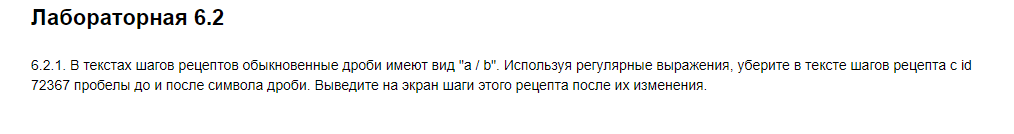

In [17]:
steps = data[data.id == '72367'].steps.values[0]
lst = steps.split('\n')[1:-1]

In [18]:
p = re.compile(r'[\s][/][\s]')
s = '1 / 2 '
lst1 = []
for i in lst:
    if p.search(i):
        i = p.sub('/', i)
    lst1.append(i)
print('\n'.join(lst1))

mix butter , flour , 1/3 c
sugar and 1-1/4 t
vanilla
press into greased 9" springform pan
mix cream cheese , 1/4 c
sugar , eggs and 1/2 t
vanilla beating until fluffy
pour over dough
combine apples , 1/3 c
sugar and cinnamon
arrange on top of cream cheese mixture and sprinkle with almonds
bake at 350 for 45-55 minutes , or until tester comes out clean


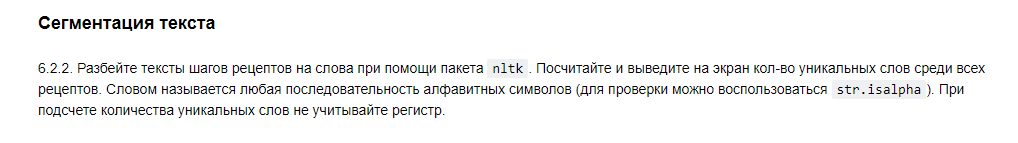

In [19]:
import nltk

In [20]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [21]:
from nltk.tokenize.toktok import ToktokTokenizer
toktok = ToktokTokenizer()

In [29]:
all_data.steps = all_data.steps.apply(lambda x: toktok.tokenize(x))

In [30]:
arr = all_data.steps.values.copy()
arr1 = []
for lst in arr:
    for i in lst:
        if i.isalpha() and i not in arr1:
            arr1.append(i)
len(arr1) 

14956

In [31]:
print(f'Количество уникальных слов: {len(arr1)}')

Количество уникальных слов: 14956


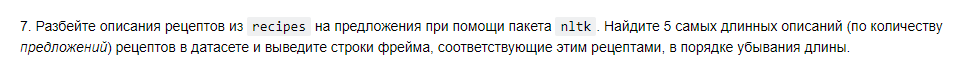

In [32]:
from nltk.tokenize import sent_tokenize
desc_lst = recipes.description.values.copy(); len(desc_lst)

30000

In [33]:
desc_lst1 = np.array(list(map(lambda x: sent_tokenize(str(x)), desc_lst)), dtype = object)
five_longest = np.argsort(list(map(lambda x: len(x), desc_lst1)))[::-1][:6]

print(f'Самые длинные(по количеству предложений) рецепты: {np.array2string(five_longest)[1:-1]}')

Самые длинные(по количеству предложений) рецепты: 18408   481 22566 16296  6779 14136


In [34]:
recipes.loc[five_longest, :]

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
18408,my favorite buttercream icing for decorating,334113,30,681465,2008-10-30,12.0,this wonderful icing is used for icing cakes a...,NaN
481,alligator claws avocado fritters with chipot...,287008,45,765354,2008-02-19,NaN,a translucent golden-brown crust allows the gr...,9.0
22566,rich barley mushroom soup,328708,60,221776,2008-10-03,NaN,this is one of the best soups i've ever made a...,10.0
16296,little bunny foo foo cake carrot cake with c...,316000,68,689540,2008-07-27,14.0,the first time i made this cake i grated a mil...,NaN
6779,chocolate tea,205348,6,428824,2007-01-14,NaN,i wrote this because there are an astounding l...,NaN
14136,hot and sour soup betty foo hunan restaurant,141637,35,167236,2005-10-17,NaN,this is the recipe as taught in the main line ...,19.0


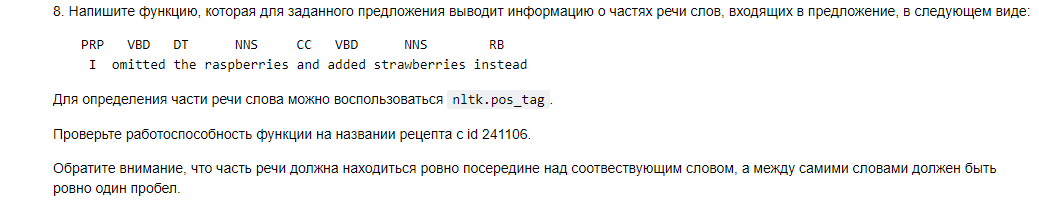

In [36]:
def sent(sentence:str):
    ret = f''
    ret1 = f''
    for word, part in nltk.pos_tag(sentence.split()):
        ret += f'{part: ^{len(word) + 1}}'
        ret1 += f'{word: ^{len(word) + 1}}'
    print(ret,'\n', ret1)

In [37]:
sent(recipes[recipes.id == str(241106)].name.values[0])

   JJ      NNS   IN     NNS     VBP   JJ    CC   JJ    NNS   
 eggplant steaks with chickpeas feta cheese and black olives 
